In [38]:
import os
import numpy as np
import pandas as pd

In [39]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow import keras

In [40]:
directory = 'modified_data/'

eeg_data = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    eeg_data.append(data.drop(['label'] , axis = 1))
    

In [41]:
labels = np.array(labels)
eeg_data = np.array(eeg_data)
print(len(labels) , eeg_data.shape)

1045 (1045, 512, 14)


In [42]:
test_data = eeg_data[:83]
test_label = labels[:83]

eeg_data = eeg_data[83:]
labels = labels[83:]

In [43]:
eeg_data.shape

(962, 512, 14)

In [44]:
# Set input shape for CNN
def init_model(): 
    input_shape = (512,14,1)

    # Define CNN model architecture
    model = Sequential()

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.3))
    model.add(Flatten())

    model.add(Dense(164, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))
    
    #compile model
    model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    #return model
    return model

In [45]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
k_fold = list(kfold.split(eeg_data , labels))


In [46]:
folds = []

In [47]:
count = 0

In [48]:
testing_scores = []
training_score = []
for train_indices, test_indices in k_fold:
    
    X_train, X_test = eeg_data[train_indices], eeg_data[test_indices]
    y_train, y_test = labels[train_indices], labels[test_indices]
    
#     train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
#     test_0, test_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    model = init_model()
    # Train the model on the training data for this fold
    history = model.fit(X_train, y_train, epochs = 200 , batch_size = 16)
    count+=1
    print(count)
    training_score.append(history.history['accuracy'][-1] * 100)
    folds.append(history)
    
    # Evaluate the model on the validation data for this fold
    score = model.evaluate(X_test, y_test)
    testing_scores.append(score[1] * 100)


Epoch 1/200
49/49 [==============================] - 7s 103ms/step - loss: 1.1213 - accuracy: 0.5579
Epoch 2/200
49/49 [==============================] - 5s 107ms/step - loss: 0.6211 - accuracy: 0.7035
Epoch 3/200
49/49 [==============================] - 5s 103ms/step - loss: 0.4645 - accuracy: 0.7867
Epoch 4/200
49/49 [==============================] - 5s 100ms/step - loss: 0.3669 - accuracy: 0.8466
Epoch 5/200
49/49 [==============================] - 5s 100ms/step - loss: 0.2517 - accuracy: 0.8908
Epoch 6/200
49/49 [==============================] - 5s 99ms/step - loss: 0.1959 - accuracy: 0.9272
Epoch 7/200
49/49 [==============================] - 5s 99ms/step - loss: 0.1875 - accuracy: 0.9233
Epoch 8/200
49/49 [==============================] - 5s 98ms/step - loss: 0.1387 - accuracy: 0.9454
Epoch 9/200
49/49 [==============================] - 5s 99ms/step - loss: 0.1219 - accuracy: 0.9597
Epoch 10/200
49/49 [==============================] - 7s 143ms/step - loss: 0.1070 - accuracy: 

49/49 [==============================] - 7s 151ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 82/200
49/49 [==============================] - 5s 109ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 83/200
49/49 [==============================] - 7s 134ms/step - loss: 0.0101 - accuracy: 0.9974
Epoch 84/200
49/49 [==============================] - 6s 119ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/200
49/49 [==============================] - 5s 109ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 86/200
49/49 [==============================] - 5s 108ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 87/200
49/49 [==============================] - 5s 111ms/step - loss: 0.0043 - accuracy: 0.9974
Epoch 88/200
49/49 [==============================] - 5s 110ms/step - loss: 0.0158 - accuracy: 0.9961
Epoch 89/200
49/49 [==============================] - 5s 110ms/step - loss: 0.0076 - accuracy: 0.9987
Epoch 90/200
49/49 [==============================] - 6s 115ms/step - loss: 0.0014 - accuracy: 

49/49 [==============================] - 7s 147ms/step - loss: 2.6017e-04 - accuracy: 1.0000
Epoch 161/200
49/49 [==============================] - 6s 114ms/step - loss: 6.1188e-04 - accuracy: 1.0000
Epoch 162/200
49/49 [==============================] - 6s 113ms/step - loss: 4.5575e-04 - accuracy: 1.0000
Epoch 163/200
49/49 [==============================] - 6s 112ms/step - loss: 4.5852e-04 - accuracy: 1.0000
Epoch 164/200
49/49 [==============================] - 5s 110ms/step - loss: 5.0460e-04 - accuracy: 1.0000
Epoch 165/200
49/49 [==============================] - 5s 110ms/step - loss: 0.0031 - accuracy: 0.9987
Epoch 166/200
49/49 [==============================] - 6s 118ms/step - loss: 4.4520e-04 - accuracy: 1.0000
Epoch 167/200
49/49 [==============================] - 6s 120ms/step - loss: 2.7462e-04 - accuracy: 1.0000
Epoch 168/200
49/49 [==============================] - 5s 111ms/step - loss: 0.0029 - accuracy: 0.9987
Epoch 169/200
49/49 [==============================] - 7s 1

49/49 [==============================] - 9s 173ms/step - loss: 0.0147 - accuracy: 0.9987
Epoch 39/200
49/49 [==============================] - 9s 173ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 40/200
49/49 [==============================] - 9s 176ms/step - loss: 0.0139 - accuracy: 0.9974
Epoch 41/200
49/49 [==============================] - 10s 200ms/step - loss: 0.0178 - accuracy: 0.9948
Epoch 42/200
49/49 [==============================] - 8s 174ms/step - loss: 0.0090 - accuracy: 0.9974
Epoch 43/200
49/49 [==============================] - 7s 142ms/step - loss: 0.0070 - accuracy: 0.9987
Epoch 44/200
49/49 [==============================] - 6s 124ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 45/200
49/49 [==============================] - 6s 123ms/step - loss: 0.0066 - accuracy: 0.9987
Epoch 46/200
49/49 [==============================] - 6s 115ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 47/200
49/49 [==============================] - 6s 125ms/step - loss: 0.0130 - accuracy:

49/49 [==============================] - 6s 132ms/step - loss: 0.0085 - accuracy: 0.9987
Epoch 119/200
49/49 [==============================] - 6s 129ms/step - loss: 6.2438e-04 - accuracy: 1.0000
Epoch 120/200
49/49 [==============================] - 8s 162ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 121/200
49/49 [==============================] - 7s 153ms/step - loss: 0.0030 - accuracy: 0.9987
Epoch 122/200
49/49 [==============================] - 7s 132ms/step - loss: 0.0144 - accuracy: 0.9974
Epoch 123/200
49/49 [==============================] - 7s 146ms/step - loss: 0.0070 - accuracy: 0.9974
Epoch 124/200
49/49 [==============================] - 8s 160ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 125/200
49/49 [==============================] - 7s 142ms/step - loss: 0.0103 - accuracy: 0.9948
Epoch 126/200
49/49 [==============================] - 7s 140ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 127/200
49/49 [==============================] - 8s 155ms/step - loss: 0.0023

49/49 [==============================] - 6s 122ms/step - loss: 8.6366e-04 - accuracy: 1.0000
Epoch 197/200
49/49 [==============================] - 6s 118ms/step - loss: 0.0031 - accuracy: 0.9987
Epoch 198/200
49/49 [==============================] - 6s 115ms/step - loss: 9.8240e-04 - accuracy: 1.0000
Epoch 199/200
49/49 [==============================] - 5s 112ms/step - loss: 6.7555e-04 - accuracy: 1.0000
Epoch 200/200
49/49 [==============================] - 6s 120ms/step - loss: 0.0081 - accuracy: 0.9974
2
7/7 [==============================] - 1s 64ms/step - loss: 2.1396 - accuracy: 0.6321
Epoch 1/200
49/49 [==============================] - 6s 108ms/step - loss: 1.2315 - accuracy: 0.5662
Epoch 2/200
49/49 [==============================] - 6s 115ms/step - loss: 0.6812 - accuracy: 0.7000
Epoch 3/200
49/49 [==============================] - 6s 114ms/step - loss: 0.4701 - accuracy: 0.7935
Epoch 4/200
49/49 [==============================] - 5s 105ms/step - loss: 0.3563 - accuracy: 0.

49/49 [==============================] - 6s 121ms/step - loss: 0.0104 - accuracy: 0.9974
Epoch 76/200
49/49 [==============================] - 5s 110ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 77/200
49/49 [==============================] - 5s 108ms/step - loss: 0.0089 - accuracy: 0.9987
Epoch 78/200
49/49 [==============================] - 5s 110ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 79/200
49/49 [==============================] - 5s 112ms/step - loss: 0.0029 - accuracy: 0.9987
Epoch 80/200
49/49 [==============================] - 6s 113ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 81/200
49/49 [==============================] - 5s 112ms/step - loss: 0.0032 - accuracy: 0.9987
Epoch 82/200
49/49 [==============================] - 5s 108ms/step - loss: 0.0505 - accuracy: 0.9831
Epoch 83/200
49/49 [==============================] - 6s 113ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 84/200
49/49 [==============================] - 5s 106ms/step - loss: 0.0064 - accuracy: 

49/49 [==============================] - 5s 101ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 155/200
49/49 [==============================] - 5s 102ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 156/200
49/49 [==============================] - 5s 104ms/step - loss: 7.3613e-04 - accuracy: 1.0000
Epoch 157/200
49/49 [==============================] - 5s 103ms/step - loss: 8.6226e-04 - accuracy: 1.0000
Epoch 158/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 159/200
49/49 [==============================] - 5s 101ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 160/200
49/49 [==============================] - 5s 101ms/step - loss: 4.3475e-04 - accuracy: 1.0000
Epoch 161/200
49/49 [==============================] - 5s 105ms/step - loss: 4.2422e-04 - accuracy: 1.0000
Epoch 162/200
49/49 [==============================] - 5s 108ms/step - loss: 6.0842e-04 - accuracy: 1.0000
Epoch 163/200
49/49 [==============================] - 5s 102ms/ste

49/49 [==============================] - 5s 108ms/step - loss: 0.0121 - accuracy: 0.9987
Epoch 33/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0084 - accuracy: 0.9987
Epoch 34/200
49/49 [==============================] - 5s 106ms/step - loss: 0.0160 - accuracy: 0.9961
Epoch 35/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0094 - accuracy: 0.9974
Epoch 36/200
49/49 [==============================] - 5s 108ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 37/200
49/49 [==============================] - 5s 105ms/step - loss: 0.0124 - accuracy: 0.9974
Epoch 38/200
49/49 [==============================] - 5s 101ms/step - loss: 0.0101 - accuracy: 0.9974
Epoch 39/200
49/49 [==============================] - 5s 102ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 40/200
49/49 [==============================] - 5s 107ms/step - loss: 0.0110 - accuracy: 0.9987
Epoch 41/200
49/49 [==============================] - 5s 105ms/step - loss: 0.0092 - accuracy: 

Epoch 112/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 113/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 114/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 115/200
49/49 [==============================] - 5s 105ms/step - loss: 8.2846e-04 - accuracy: 1.0000
Epoch 116/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 117/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0026 - accuracy: 0.9987
Epoch 118/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0059 - accuracy: 0.9974
Epoch 119/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0052 - accuracy: 0.9987
Epoch 120/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0137 - accuracy: 0.9974
Epoch 121/200
49/49 [==============================] - 5s 103ms/step 

49/49 [==============================] - 5s 103ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 192/200
49/49 [==============================] - 5s 103ms/step - loss: 9.6111e-04 - accuracy: 1.0000
Epoch 193/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0041 - accuracy: 0.9974
Epoch 194/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0014 - accuracy: 0.9987
Epoch 195/200
49/49 [==============================] - 5s 104ms/step - loss: 5.2110e-04 - accuracy: 1.0000
Epoch 196/200
49/49 [==============================] - 5s 103ms/step - loss: 5.1323e-04 - accuracy: 1.0000
Epoch 197/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0020 - accuracy: 0.9987
Epoch 198/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0152 - accuracy: 0.9961
Epoch 199/200
49/49 [==============================] - 5s 103ms/step - loss: 4.3712e-04 - accuracy: 1.0000
Epoch 200/200
49/49 [==============================] - 5s 103ms/step - 

49/49 [==============================] - 5s 104ms/step - loss: 0.0175 - accuracy: 0.9974
Epoch 71/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0063 - accuracy: 0.9987
Epoch 72/200
49/49 [==============================] - 5s 105ms/step - loss: 0.0071 - accuracy: 0.9974
Epoch 73/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0253 - accuracy: 0.9935
Epoch 74/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 75/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 76/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0070 - accuracy: 0.9961
Epoch 77/200
49/49 [==============================] - 5s 105ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 78/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 79/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0032 - accuracy: 

49/49 [==============================] - 5s 104ms/step - loss: 1.4810e-04 - accuracy: 1.0000
Epoch 150/200
49/49 [==============================] - 5s 105ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 151/200
49/49 [==============================] - 5s 103ms/step - loss: 1.9496e-04 - accuracy: 1.0000
Epoch 152/200
49/49 [==============================] - 5s 104ms/step - loss: 3.4135e-04 - accuracy: 1.0000
Epoch 153/200
49/49 [==============================] - 5s 105ms/step - loss: 2.6425e-04 - accuracy: 1.0000
Epoch 154/200
49/49 [==============================] - 5s 104ms/step - loss: 0.0116 - accuracy: 0.9974
Epoch 155/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0065 - accuracy: 0.9974
Epoch 156/200
49/49 [==============================] - 5s 103ms/step - loss: 0.0048 - accuracy: 0.9974
Epoch 157/200
49/49 [==============================] - 5s 98ms/step - loss: 0.0106 - accuracy: 0.9974
Epoch 158/200
49/49 [==============================] - 5s 98ms/step - lo

In [49]:
testing_scores

[61.65803074836731,
 63.21243643760681,
 80.20833134651184,
 72.91666865348816,
 72.91666865348816]

In [50]:
training_score 

[99.73992109298706, 99.73992109298706, 99.8701274394989, 100.0, 100.0]

In [51]:
folds

In [52]:
avg_score = sum(testing_scores) / len(testing_scores)
print('Average testing score:', avg_score)

Average testing score: 70.18242716789246


In [53]:
# c = 1
# co = 0
# for i in folds:
#     plt.figure(figsize = (12,8))
#     plt.subplot(5,1,c)
#     plt.plot(i.history['accuracy'], label='val_accuracy')
# #     plt.plot(i.history['val_accuracy'], label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.ylim([0.5, 1])
#     plt.legend(loc='lower right')
#     c+=1
#     co+=1

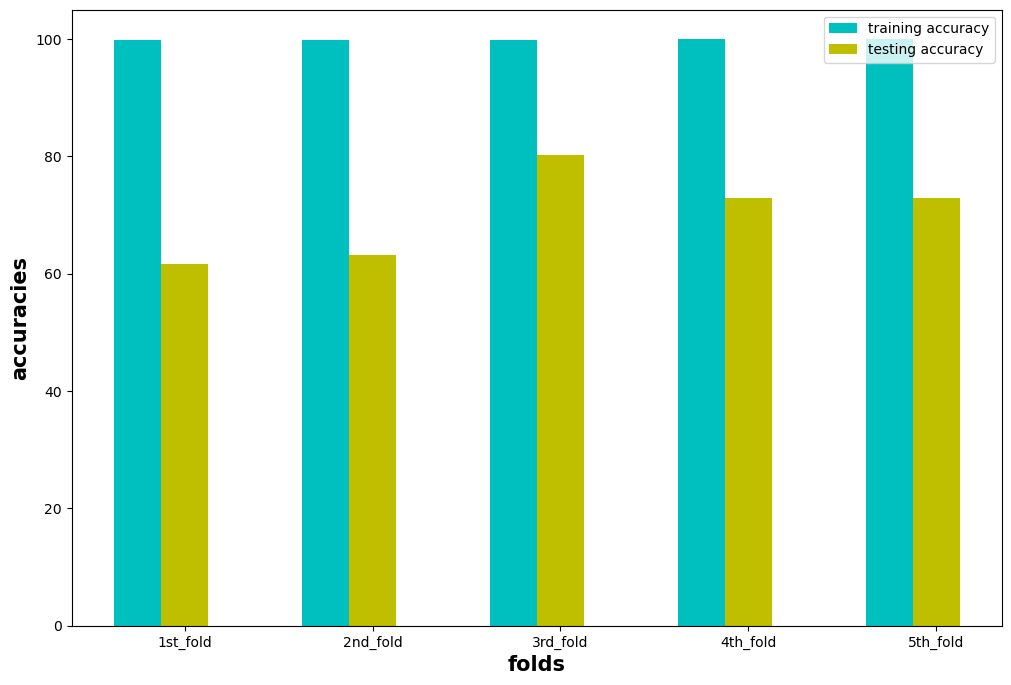

In [54]:
x = ['1st_fold' , '2nd_fold' , '3rd_fold' , '4th_fold' , '5th_fold']
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(x))
br2 = [x + barWidth for x in br1]
plt.bar(br1  , training_score[:5] , color = "c" , label = "training accuracy" ,width = barWidth)
plt.bar(br2 , testing_scores[:5] , color = "y" , label = "testing accuracy" , width = barWidth)
plt.xlabel('folds', fontweight ='bold', fontsize = 15)
plt.ylabel('accuracies', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x)
 
plt.legend()
plt.show()

# ensambled the models

In [55]:
y_pred = []
for data in test_data:
    res= []
    for modl in folds[:5]:
        res.append(np.argmax(modl.model.predict(np.array([data , ]))))
    print(res)
    
    if res.count(0) > res.count(1):
        y_pred.append(0)
    else:
        y_pred.append(1)
        
           
        

1/1 [==============================] - 0s 98ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 0, 0, 1, 0]
1/1 [==============================] - 0s 23ms/step
[1, 1, 0, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 0, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[0, 1, 1, 0, 0]
1/1 [==============================] - 0s 23ms/step
[0, 0, 0, 0, 1]
1/1 [==============================] - 0s 25ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 1, 1, 1, 0]
1/1 [==============================] - 0s 25ms/step
[1, 1, 0, 1, 1]
1/1 [==============================] - 0s 23ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 23ms/s

1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[0, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 25ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 1, 0, 1, 0]
1/1 [==============================] - 0s 22ms/step
[1, 1, 1, 0, 0]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/s

1/1 [==============================] - 0s 24ms/step
[0, 1, 0, 1, 1]
1/1 [==============================] - 0s 25ms/step
[1, 0, 1, 1, 0]
1/1 [==============================] - 0s 25ms/step
[1, 0, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[0, 0, 0, 1, 0]
1/1 [==============================] - 0s 24ms/step
[0, 0, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 22ms/step
[0, 0, 1, 0, 0]
1/1 [==============================] - 0s 23ms/step
[0, 0, 1, 1, 1]
1/1 [==============================] - 0s 22ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 0, 1, 0, 0]
1/1 [==============================] - 0s 25ms/s

# Evaluate ensambeled Model

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

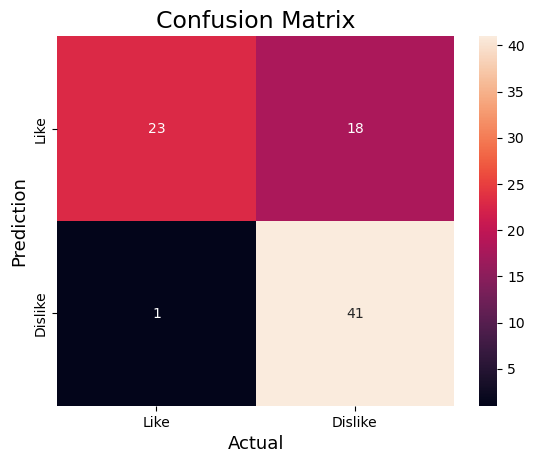

In [57]:
cm = confusion_matrix(test_label,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [58]:
accuaracy = (cm[0][0] + cm[1][1]) / test_data.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [59]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  77.10843373493977
Precision:  56.09756097560976
Recall:  95.83333333333334
F1 SCore:  70.76923076923077


# save the models

In [60]:
# num_fold = 1
# for i in folds:
#     i.model.save(f'models/modified-data-5Fold-5Model/fold_{num_fold}')
#     num_fold+=1

In [61]:
len(k_fold)

5

In [62]:
k_fold[4]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [63]:
folds